<a href="https://colab.research.google.com/github/Ali-Felfel/NLP/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk.tokenize import word_tokenize
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm_notebook as tqdm


# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense
from keras.layers import Dropout
from keras.regularizers import l2,l1


In [ ]:
# Number of labels: joy, anger, fear, sadness, neutral
num_classes = 8

# Number of dimensions for word embedding
embed_num_dims = 300

# Max input length (max number of words) 
max_seq_len = 500

class_names = ['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy','Sadness','Surprise','Trust']

In [ ]:
data_train = pd.read_csv("training_set.txt", delimiter = "\t")
# df_dev = pd.read_csv("Data/dev_set.txt", delimiter = "\t")
data_test = pd.read_csv("dev_set.txt", delimiter = "\t")





In [ ]:
data_test1=pd.read_csv("test_set.txt", delimiter = "\t")

In [ ]:
X_train = data_train['sentence']
X_test = data_test['sentence']

y_train = data_train['emotion']
y_test = data_test['emotion']

data = data_train.append(data_test, ignore_index=True)

In [ ]:
data_train

,sentence,emotion
0,I'm too old to be traded in .,6
1,Mother said you could always tell a lady by he...,8
2,I always said I'd leave off when the time came .,6
3,He'll be safe with me .,2
4,Lay off .,1
...,...,...
13995,"Yes , Commissioner .",8
13996,The ring !,7
13997,That is my greatest and most enduring love .,5
13998,"When I came back from the war , I had a son .",5


In [ ]:
data_test

,sentence,emotion
0,What happens to the gold in our safe ?,4
1,Natural to get cold feet .,8
2,"Not very lucky , is he ?",7
3,I'm just a little anxious to get up there and ...,2
4,Did you think we don't know about your affair ...,1
...,...,...
995,All I ask of you is be careful .,4
996,"You don't like jazz , pal ?",7
997,Put it on .,1
998,Can you ever imagine [PERSON] being in a spot ...,7


In [ ]:
print(data.emotion.value_counts())
data.head(6)

1    3210
2    2299
8    2253
5    1567
4    1546
6    1471
3    1420
7    1234
Name: emotion, dtype: int64


,sentence,emotion
0,I'm too old to be traded in .,6
1,Mother said you could always tell a lady by he...,8
2,I always said I'd leave off when the time came .,6
3,He'll be safe with me .,2
4,Lay off .,1
5,You tell him to take care of you .,8


**Preprocessing** 

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
import string
import re 

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer('english')

In [ ]:
shortword = re.compile(r'\W*\b\w{1,3}\b')

In [ ]:
def clean(text_list, lemmatize, stemmer):
    """
    Function that a receives a list of strings and preprocesses it.
    
    :param text_list: List of strings.
    :param lemmatize: Tag to apply lemmatization if True.
    :param stemmer: Tag to apply the stemmer if True.
    """
    
    updates = []
    for j in tqdm(range(len(text_list))):
        
        text = text_list[j]
        
        #LOWERCASE TEXT
        text = text.lower()
#         #Tokenize
#         text = re.split('\s+' ,text)     

        # text = shortword.sub('', text)    
        
        # # REMOVE NUMERICAL DATA AND PUNCTUATION
        # text = re.sub("[^a-zA-Z]", ' ', text)
        # # REMOVE TAGS
        # text = BeautifulSoup(text).get_text()
        
        # #REMOVE STOP WORDS
        # text = ' '.join([word for word in text.split() if word not in stop])
        
        # #LEMMATIZATION
        # if lemmatize:
        #     text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        # #STEMMER
        # if stemmer:
        #     text = " ".join(snowball_stemmer.stem(word) for word in text.split())
        
        updates.append(text)
        
    return updates
def update_df(dataframe, list_updated):
    dataframe.update(pd.DataFrame({"sentence": list_updated}))

In [ ]:
updates = clean(X_train, lemmatize = False, stemmer = False)

update_df(data_train, updates)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/14000 [00:00<?, ?it/s]

In [ ]:
updates = clean(X_test , lemmatize = False, stemmer = False)

update_df(data_test, updates)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
def clean_text(data):
    
    # remove hashtags and @usernames
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    
    # tekenization using nltk
    data = word_tokenize(data)
    
    return data
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
texts = [' '.join(clean_text(sentence)) for sentence in data.sentence]




In [ ]:
texts_train = [' '.join(clean_text(sentence)) for sentence in X_train]
texts_test = [' '.join(clean_text(sentence)) for sentence in X_test]

In [ ]:
print(texts_train[92])

that 's how marriages are arranged down here .


**Tokenization + fitting using keras**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 7750


In [ ]:
X_train_pad = pad_sequences(sequence_train)
X_test_pad = pad_sequences(sequence_test )

X_train_pad

array([[   0,    0,    0, ...,   25, 3811,   16],
       [   0,    0,    0, ...,  121,   62,  373],
       [   0,    0,    0, ...,    3,   83,  414],
       ...,
       [   0,    0,    0, ...,  272, 7491,  107],
       [   0,    0,    0, ...,   97,    5,  218],
       [   0,    0,    0, ...,    3,  639, 1921]], dtype=int32)

In [ ]:
X_test_pad

array([[   0,    0,    0, ...,   16,  104,  405],
       [   0,    0,    0, ...,   35,  520,  623],
       [   0,    0,    0, ...,  756,   17,   22],
       ...,
       [   0,    0,    0, ...,  178,    7,   33],
       [   0,    0,    0, ..., 1096,   37,    9],
       [   0,    0,    0, ...,    6, 1305,   78]], dtype=int32)

In [ ]:
# encoding = {
#     'joy': 0,
#     'sadness': 1,
#     'fear': 2,
#     'anger': 3,
#     'neutral': 4
# }
# encoding = {1 : "Anger", 2 : "Anticipation", 3: "Disgust", 4 : "Fear", 5 : "Joy",6 : "Sadness",7 : "Surprise",8 : "Trust"}

# # Integer values for each class
# y_train = [encoding[x] for x in y_train]
# y_test = [encoding[x] for x in y_test]

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

**Import pretrained word vectors**

In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 2  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [ ]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r') as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')

Unzipping...
done.


In [ ]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(7752, 300)

In [ ]:
# Inspect unseen words
new_words = 0

for word in index_of_words:
    entry = embedd_matrix[index_of_words[word]]
    if all(v == 0 for v in entry):
        new_words = new_words + 1

print('Words found in wiki vocab: ' + str(len(index_of_words) - new_words))
print('New words found: ' + str(new_words))


Words found in wiki vocab: 7590
New words found: 160


In [ ]:
embed_num_dims

300

In [ ]:
max_seq_len

500

In [ ]:
vocab_size

7751

**Create LSTM Pipeline**

In [ ]:
# Embedding layer before the actaul BLSTM 
embedd_layer = Embedding(vocab_size+1,
                         embed_num_dims,                        
                         weights = [embedd_matrix],
                         trainable=False)

In [ ]:
num_classes

8

In [ ]:

# Parameters
gru_output_size = 128
bidirectional = True

# Embedding Layer, LSTM or biLSTM, Dense, softmax
model = Sequential()
model.add(embedd_layer)

if bidirectional:
    model.add(Bidirectional(GRU(units=gru_output_size,
                              dropout=0.2,
                              recurrent_dropout=0.2)))
else:
     model.add(GRU(units=gru_output_size,
                dropout=0.2, 
                recurrent_dropout=0.2))
# model.add(Dense(128,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) ,activation='relu'))
# model.add(Dense(256,kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01) ,activation='relu'))

model.add(Dense(num_classes+1, activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         2325600   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              330240    
 l)                                                              
                                                                 
 dense (Dense)               (None, 9)                 2313      
                                                                 
Total params: 2,658,153
Trainable params: 332,553
Non-trainable params: 2,325,600
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 10

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/10
110/110 [==============================] - 50s 390ms/step - loss: 1.9553 - accuracy: 0.2569 - val_loss: 1.8106 - val_accuracy: 0.3180
Epoch 2/10
110/110 [==============================] - 43s 387ms/step - loss: 1.7383 - accuracy: 0.3560 - val_loss: 1.6860 - val_accuracy: 0.3640
Epoch 3/10
110/110 [==============================] - 43s 392ms/step - loss: 1.6525 - accuracy: 0.3883 - val_loss: 1.6342 - val_accuracy: 0.3930
Epoch 4/10
110/110 [==============================] - 42s 385ms/step - loss: 1.6059 - accuracy: 0.4122 - val_loss: 1.6352 - val_accuracy: 0.4140
Epoch 5/10
110/110 [==============================] - 43s 389ms/step - loss: 1.5731 - accuracy: 0.4247 - val_loss: 1.6033 - val_accuracy: 0.4080
Epoch 6/10
110/110 [==============================] - 42s 384ms/step - loss: 1.5459 - accuracy: 0.4349 - val_loss: 1.5916 - val_accuracy: 0.4070
Epoch 7/10
110/110 [==============================] - 42s 385ms/step - loss: 1.5310 - accuracy: 0.4415 - val_loss: 1.5920 - val_ac

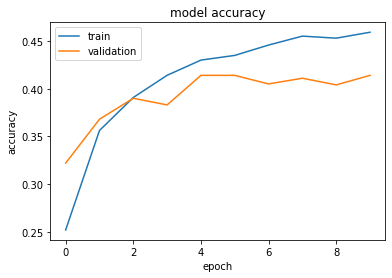

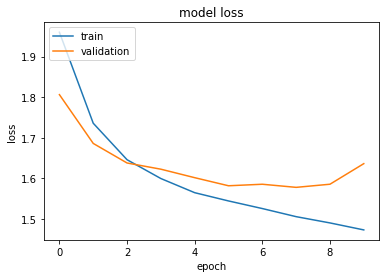

In [ ]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(data_test.emotion, predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(data_test.emotion, predictions, average='micro') * 100))

Accuracy: 41.40%

F1 Score: 41.40


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


F1 Score: 41.40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


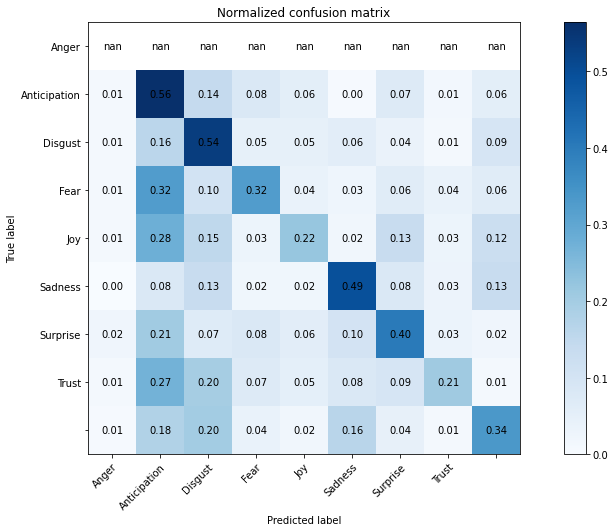

In [ ]:
print("\nF1 Score: {:.2f}".format(f1_score(data_test.emotion, predictions, average='micro') * 100))

# Plot normalized confusion matrix
plot_confusion_matrix(data_test.emotion, predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [ ]:
predictions1 = [class_names[pred] for pred in predictions-1]

In [ ]:
print('Message: {}\nPredicted: {}'.format(X_test[4], predictions1[4]))

Message: did you think we don't know about your affair with a government official ?
Predicted: Anger


In [ ]:
print('Message: {}\nPredicted: {}'.format(X_test[(333)], predictions1[333]))


Message: which hedgehog ?
Predicted: Surprise


In [ ]:
updates = clean(data_test1['sentence'], lemmatize = False, stemmer = False)

update_df(data_test1, updates)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
data_test1['sentence']

0                   come , let's go get that automobile .
1                         well , some other time , then ?
2                                 he's in trouble . boy ?
3                    criminal gang unit to take control .
4                  by molto . no discussion . interview .
                              ...                        
1995                                 let's do some good .
1996                          hey , you're looking good .
1997    have they moved the embassy , or are you hijac...
1998                                          what that !
1999    imagine interplanetary trade , how exciting th...
Name: sentence, Length: 2000, dtype: object

In [ ]:
texts_test1 = [' '.join(clean_text(sentence)) for sentence in data_test1['sentence']]


In [ ]:
sequence_test1 = tokenizer.texts_to_sequences(texts_test1)


In [ ]:
X_test_pad1 = pad_sequences(sequence_test1 )


In [ ]:
TEST_predictions = model.predict(X_test_pad1)
TEST_predictions = np.argmax(TEST_predictions, axis=1)

In [ ]:
dev_prediction = model.predict (X_test_pad)
dev_prediction = np.argmax(dev_prediction, axis=1)

In [ ]:
dev_prediction

array([4, 6, 5, 3, 7, 8, 2, 3, 1, 5, 2, 6, 1, 8, 2, 6, 2, 1, 1, 4, 5, 5,
       1, 4, 1, 7, 5, 4, 2, 2, 2, 1, 8, 2, 6, 6, 1, 2, 8, 2, 4, 8, 1, 1,
       2, 8, 2, 1, 5, 1, 2, 2, 5, 5, 6, 6, 6, 1, 2, 6, 1, 7, 3, 8, 1, 1,
       5, 2, 1, 6, 7, 2, 6, 4, 8, 2, 1, 8, 2, 3, 2, 4, 5, 1, 4, 8, 1, 1,
       1, 8, 2, 1, 4, 2, 8, 1, 1, 1, 1, 5, 1, 2, 3, 1, 6, 2, 2, 7, 1, 2,
       2, 8, 1, 1, 1, 5, 5, 5, 5, 1, 2, 8, 1, 4, 7, 2, 1, 7, 2, 1, 5, 1,
       1, 8, 4, 1, 1, 2, 2, 2, 5, 5, 2, 1, 8, 8, 8, 6, 1, 6, 8, 8, 5, 1,
       1, 5, 4, 7, 4, 6, 6, 2, 1, 1, 5, 7, 2, 5, 1, 7, 2, 2, 2, 1, 1, 6,
       2, 7, 3, 6, 5, 5, 7, 1, 4, 8, 2, 5, 8, 6, 4, 2, 6, 4, 5, 8, 1, 2,
       1, 8, 1, 1, 1, 7, 1, 4, 8, 1, 8, 6, 7, 1, 1, 8, 5, 1, 2, 2, 1, 1,
       2, 2, 5, 1, 5, 8, 8, 2, 8, 1, 2, 4, 2, 1, 2, 5, 6, 7, 2, 3, 4, 1,
       3, 1, 2, 6, 1, 5, 8, 1, 1, 6, 7, 3, 1, 4, 6, 1, 2, 1, 2, 8, 1, 4,
       3, 6, 4, 7, 2, 1, 1, 6, 2, 8, 2, 2, 1, 2, 8, 8, 1, 1, 1, 1, 8, 1,
       1, 8, 7, 8, 1, 7, 8, 6, 6, 1, 5, 2, 3, 4, 2,

In [ ]:
data_dev = data_test.drop(columns=['emotion'])

In [ ]:
data_dev

,sentence,emotion
0,what happens to the gold in our safe ?,4
1,natural to get cold feet .,6
2,"not very lucky , is he ?",5
3,i'm just a little anxious to get up there and ...,3
4,did you think we don't know about your affair ...,7
...,...,...
995,all i ask of you is be careful .,8
996,"you don't like jazz , pal ?",8
997,put it on .,1
998,can you ever imagine [person] being in a spot ...,7


In [ ]:
data_dev['emotion']= dev_prediction

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/outpur.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  data_dev.to_csv(r"predicted.csv", header=None, index=False, sep='\t', mode='a')

Mounted at /content/drive


In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(data_test.emotion, predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(data_test.emotion, predictions, average='micro') * 100))

Accuracy: 41.40%

F1 Score: 41.40


In [ ]:
TEST_predictions

array([2, 2, 4, ..., 1, 7, 2])

In [ ]:
data_test1["emotion"]=TEST_predictions

In [ ]:
data_test1

,sentence,emotion
0,"come , let's go get that automobile .",2
1,"well , some other time , then ?",2
2,he's in trouble . boy ?,4
3,criminal gang unit to take control .,1
4,by molto . no discussion . interview .,1
...,...,...
1995,let's do some good .,8
1996,"hey , you're looking good .",5
1997,"have they moved the embassy , or are you hijac...",1
1998,what that !,7


In [ ]:
data_test1.to_csv("predicted.txt" ,header=None, index=False, sep='\t', mode='a')

In [ ]:
from google.colab import files

In [ ]:
files.download('predicted.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_test1.to_csv(r'c:\pandas.txt', header=None, index=False, sep='\t', mode='a')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/outpur.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  data_test1.to_csv(r"predicted.csv", header=None, index=False, sep='\t', mode='a')

Mounted at /content/drive


In [ ]:
data_dev.to_csv("dev.txt" ,header=None, index=False, sep='\t', mode='a')
from google.colab import files
files.download('dev.txt')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>